<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# PyTorch In-Class Exercise

In [1]:
# Install pytorch and torchvision if you have not already done so
# pip3 install torch torchvision

In [2]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

torch.manual_seed(0)

In [3]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
X,y= np.array(X),np.array(y)

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Let's scale our data to help the algorithm converge faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Adaline from Scratch
Below is an implementation of Adaline using only Python and NumPy.  For simplicity it does not include the bias term.

In [16]:
class Adaline:
    
    def __init__(self,eta=0.01,n_iter=100,random_state=0):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        self.cost_path=[]
    
    def fit(self,X,y):
        # Initialize the weights and bias (weights[0]) to small random numbers
        rgen=np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0,scale=0.01,size=(X.shape[1]))
        
        # Train adaline using batch gradient descent
        for i in range(self.n_iter):
            yhat = self.predict(X)
            # Calculate the cost function
            cost = np.sum(0.5 * (y-yhat)**2)
            # Gradient of cost with respect to weights
            gradient_weights = (y-yhat).T.dot(-X)
            # Update weights
            delta_weights = self.eta * gradient_weights
            self.weights -= delta_weights
            # Add cost to total cost counter
            self.cost_path.append(cost)
        return self
    
    def predict(self,X):
        z = np.dot(X,self.weights)
        yhat = 1*z
        return yhat

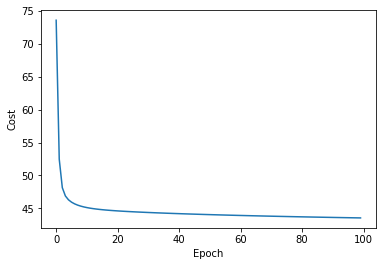

In [17]:
# Run the Adaline from scratch
adaline_model = Adaline(eta=0.0001,n_iter=100)
adaline_model.fit(X_train_scaled,y_train)
plt.plot(range(len(adaline_model.cost_path)),adaline_model.cost_path)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Adaline using Autograd
Complete the methods of the class `Adaline_torch` below to train the model and generate predictions.  This implementation should use PyTorch and its autograd functionality rather than manually calculating the gradient of the cost function.  You do not need to include the bias term in this implementation.

In [18]:
class Adaline_torch:
    
    def __init__(self,eta=0.01,n_iter=100,random_state=0):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        P = X.shape[1] # Number of features
        # Initialize the weights to small random numbers and be sure to set requires_grad=True
        self.weights = torch.rand(P,requires_grad=True)
        
        # Train adaline using batch gradient descent
        self.cost_path=[]
        for i in range(self.n_iter):
            # Zero out the weights gradient each iteration
            if self.weights.grad is not None:
                self.weights.grad.zero_()
            
            ### BEGIN SOLUTION ###

            # Calculate yhat
            yhat = self.predict(X)
            # Calculate the cost function - Sum of Squared Error
            cost = torch.sum(0.5 * (y-yhat)**2)
            # Gradient of cost function with respect to all weights
            cost.backward()
            # Update the weights. Gradient of weights is now stored in self.weights.grad
            with torch.no_grad():
                self.weights -= self.eta * self.weights.grad
            # Add cost for the iteration to total cost counter
            self.cost_path.append(cost.detach().numpy())

            ### END SOLUTION ###
        return self
    
    def predict(self,X):
        ### BEGIN SOLUTION ###

        yhat = torch.mv(X,self.weights)
        return yhat
        
        ### END SOLUTION ###
        

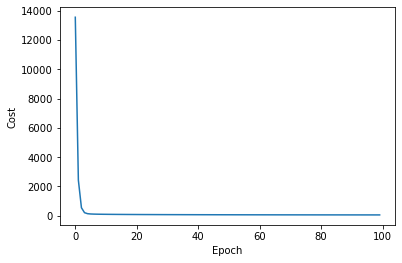

In [19]:

# Convert to tensors
X_train_scaled_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train).float()

adaline_model = Adaline_torch(eta=0.0001,n_iter=100)
adaline_model.fit(X_train_scaled_tensor,y_train_tensor)
plt.plot(range(len(adaline_model.cost_path)),adaline_model.cost_path)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()